# Art mimics life: looking into Helicopter Prison Escapes

![banner](https://i.ytimg.com/vi/7l8djgc5Zo4/maxresdefault.jpg)

## Abstract

Going to jail can mean the end of the road to anyone's life plans and dreams, but many don't settle with the idea. In this project, we look into helicopter prison breaks to come up with some stats on these cinematographic escapes and come up with the following:
 - The years with the most attempts (3) are 2009, 2007, 2001, 1986;
 - the top country for prison escape attempts was France (15), US (8);
 - The countries where criminals are more likely to succeed: Brazil(100%), US(75%), Canada(75%), and France(72%).
 - In France and in Greece, prisoners managed to escape with a helicopter twice.

## Table of Contents

1. [**Introduction**](#section1)
2. [**Goals and limitations**](#section2)
3. [**Methodology**](#section3)
4. [**Metadata**](#section4)
5. [**Data Exploration and Transformation**](#section5)      
6. [**Data Visualization and Analysis**](#section6)
7. [**Conclusion**](#section7)



## 1. Introduction <a name="section1"></a>

It is one of the most cliche scripts out there in Hollywood, and it works everytime: perilous criminals end up in jail, where everyday redemption only seems further away. Eventually, the sufferer sees an opportunity to flee, and we are caught up in the drama and adrenaline of that escape, wishing for that vile person to beat the system.

Despite all the "Prision Break"s and "Shawshank Redemption"s out there, there are actually real life prison escape attempts every year, and here we turn into the data of a specific and dramatic kind: helicopter escapes, that have been registered since 1971.

## 2. Goals and limitations<a name="section2"></a>

In this project, we'll analyze a dataset of [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts) with python to answer:
- 1- In which year did the most helicopter prison break attempts occur?
- 2- In which countries do the most attempted helicopter prison breaks occur?
- 3- In which countries are the escapes more likely to succeed?

Limitations:
- this is the very first project of the python program, so naturally the dataset is simpler and smaller: the amount of insights and further developments are very limited.

## 3. Methodology <a name="section3"></a>
In this project we deploy pandas to manipulate the data from the imported url data, as well as matplotlib and seaborn to help with visualizations for maximum values, as well as statistics on a group level.

# 4. Metadata <a name="section4"></a>

The data is obtained from the collaborative online encyclopedia, Wikipedia. It contains data spanning from 1971 to 2020, in 15 countries, prison names, as well as fugitives and details on each attempt.

## 5. Data Exploration and Transformation <a name="section5"></a>

In this step, we will:
- (1): fetch the data;
- (2): make it into a pandas dataframe
- (3): Check for data type, missing data, unwanted columns and reasonableness.

In [1]:
#(1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import matplotlib.style as style
style.use('fivethirtyeight')
sns.set(style='darkgrid')

url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data=pd.read_html(url)
print(data)

[    0                                                  1
0 NaN  This list is incomplete; you can help by addin...,                   Date                                        Prison name  \
0      August 19, 1971                              Santa Martha Acatitla   
1     October 31, 1973                                      Mountjoy Jail   
2         May 24, 1978                 United States Penitentiary, Marion   
3    February 27, 1981             Fleury-Mérogis, Essonne, Ile de France   
4          May 7, 1981                    Orsainville Prison, Quebec City   
5        January, 1983                              Pentridge (HM Prison)   
6    December 19, 1985  Perry Correctional Institution, Pelzer, South ...   
7    December 31, 1985  Cândido Mendes penitentiary, Ilha Grande, Rio ...   
8         May 26, 1986                                 Prison de la Santé   
9     November 5, 1986           Federal Correctional Institution, Dublin   
10   November 23, 1986               

The data seems to present us with a list of 2 tables, one recording prison escapes with 47 entries, the other containing tv shows with 20 entries. We are interested in analyzing only the first one.

In [2]:
#(2)
data=pd.read_html(url, match='Prison name')

#convert list do dataframe

data=data[0]
data.head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus Twomey Kevin Mallon,"On October 31, 1973, an IRA member hijacked a ..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock Trapnell Martin Joseph McNally J...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard Dupré Daniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker) Giles Arseneault (pri...,Marina Paquet held a sawed off shotgun against...


In [3]:
#(3)
data.describe(include='all')

,Date,Prison name,Country,Succeeded,Escapee(s),Details
count,48,48,48,48,48,48
unique,48,45,15,2,40,48
top,"August 19, 1971",Luynes prison,France,Yes,—,Joel David Kaplan was a New York businessman w...
freq,1,2,15,34,7,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


- (2) There are missing values '-' in the 'Escapees' column.
- The escapee names are compressed (when it is more than one by row)
- Date column should be a datetime object
- (3)'Details' column can be dropped from the table
- (1)'Escapee(s)' and 'Prison name' column could change to easier names
- Data seems reasonable


- (1): Change column names
- (2): Change data type, including the placeholder for missing data (—)
- (3): Drop unwanted columns

In [5]:
#(1)
data.rename(columns={'Prison name': 'Prison', 'Escapee(s)': 'Escapees'}, inplace=True)

In [6]:
#(2)
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data['Succeeded'] = data['Succeeded'].str.contains(r'[Yy]es')
data.replace('—', np.nan, inplace=True)

In [7]:
#(3)
data.drop('Details', axis=1, inplace=True)

In [8]:
data.head()

,Date,Prison,Country,Succeeded,Escapees
0,1971-08-19,Santa Martha Acatitla,Mexico,True,Joel David Kaplan Carlos Antonio Contreras Castro
1,1973-10-31,Mountjoy Jail,Ireland,True,JB O'Hagan Seamus Twomey Kevin Mallon
2,1978-05-24,"United States Penitentiary, Marion",United States,False,Garrett Brock Trapnell Martin Joseph McNally J...
3,1981-02-27,"Fleury-Mérogis, Essonne, Ile de France",France,True,Gérard Dupré Daniel Beaumont
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,False,Marina Paquet (hijacker) Giles Arseneault (pri...


## 6. Data Visualization and Analysis <a name="section6"></a>

In this step, we will manipulate the data, enabling us to respectivelly address the questions set in the goals by grouping them:
- (1). by Year  
- (2). by Country
- (3). by success rate by country

In [9]:
#(1)
data_by_year = data['Date'].dt.year.value_counts().sort_index()
data_by_year[data_by_year.values == data_by_year.max()] 

1986    3
2001    3
2007    3
2009    3
Name: Date, dtype: int64

In [10]:
#(1) a palette to highlight the max values in the visualization
def apply_max_palette(series, max_color='red', other_color='lightgray'):
    return[max_color if year == series.max() else other_color for year in series]

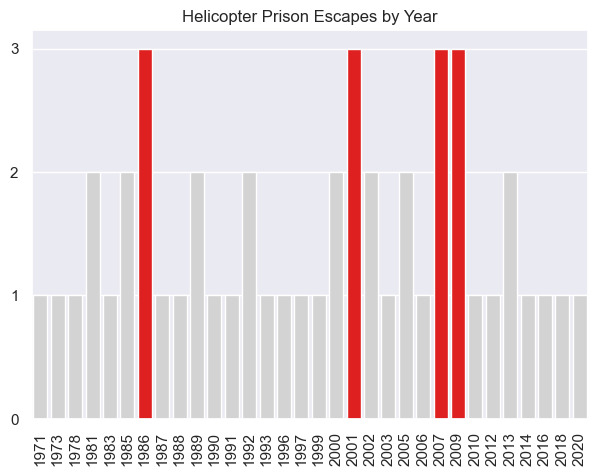

In [11]:
#(1)
sns.barplot(x=data_by_year.index, y=data_by_year.values, palette=apply_max_palette(data_by_year))
plt.title('Helicopter Prison Escapes by Year')
plt.xticks(rotation=90)
plt.yticks(ticks=[0,1,2,3])
plt.show()


'Helicopter Prison Escapes by Year', above, clearly depicts the years with the most ocurrences: 1986, 2001, 2007, 2009, whereas 18 of the 50 years analyzed have no occurrences (36%).

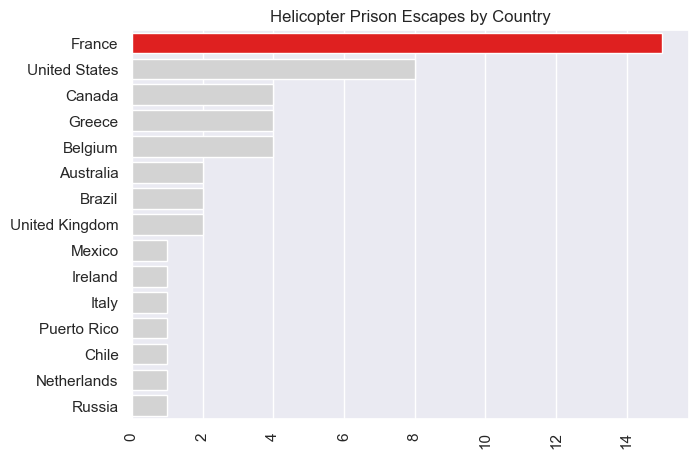

In [12]:
#(2) by country
data_by_country = data['Country'].value_counts()
sns.barplot(x=data_by_country.values, y= data_by_country.index, palette=apply_max_palette(data_by_country))
plt.title('Helicopter Prison Escapes by Country')
plt.xticks(rotation=90)
plt.show()

In [13]:
#(2). by Country
escapee_rank = data[data['Country']=='France']['Escapees'].value_counts()
escapee_rank

Michel Vaujour                                              2
Pascal Payet                                                2
Gérard Dupré Daniel Beaumont                                1
Abdelhamid Carnous Emile Forma-Sari Jean-Philippe Lecase    1
Eric Alboreo Franck Perletto Michel Valero                  1
Hubert Selles Jean-Claude Moretti Mohamed Bessame           1
Alexin Jismy Fabrice Michel                                 1
Rédoine Faïd                                                1
Name: Escapees, dtype: int64

In [14]:
data[data['Escapees']=='Pascal Payet']

,Date,Prison,Country,Succeeded,Escapees
25,2001-01-19,Luynes prison,France,True,Pascal Payet
35,2007-07-15,Grasse prison,France,True,Pascal Payet


In [15]:
data[data['Escapees']=='Michel Vaujour']

,Date,Prison,Country,Succeeded,Escapees
8,1986-05-26,Prison de la Santé,France,True,Michel Vaujour
19,1993-06-17,"Touraine Central Prison, Tours",France,False,Michel Vaujour


'Helicopter Prison Escapes by Country', above, illustrates how France is way ahead of the pack when it comes to attempted helicopter escapes (15), with the second place nearly halving all its ocurrences (8). It is astounding that in France, two prisoners attempted to escape twice, and one of them got away both times.

In [16]:
#(3) Here we decide to exclude countries that only had one incident.
rate_by_country = (data.set_index('Country')[data['Country'].value_counts()>1].groupby('Country')['Succeeded'].mean()*100).sort_values()

C:\Users\thais\AppData\Local\Temp\ipykernel_18352\1903654371.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rate_by_country = (data.set_index('Country')[data['Country'].value_counts()>1].groupby('Country')['Succeeded'].mean()*100).sort_values()


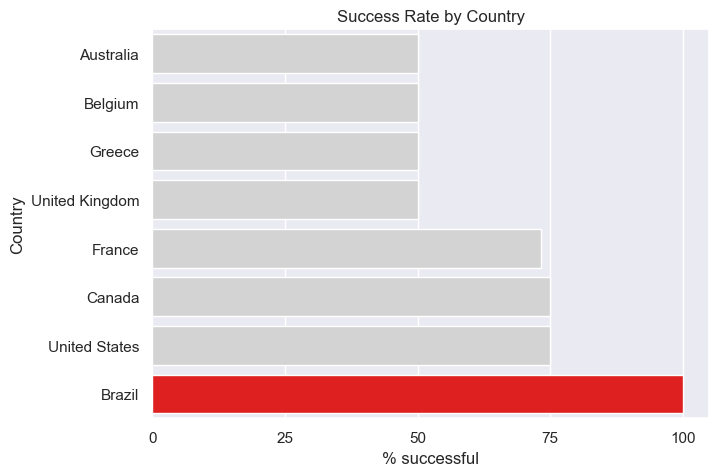

In [17]:
sns.barplot(x=rate_by_country.values, y=rate_by_country.index, palette=apply_max_palette(rate_by_country))
plt.title('Success Rate by Country')
plt.xticks(ticks=[0,25,50,75,100])
plt.xlabel('% successful')
plt.show()

In 'Success rate by Country', we can see all representative data of normalized success rate in our data: we dropped all single ocurrences. Therefore, it is more representative to say that Brazil leads with 100%, with Canada, United States trailing behind

In [18]:
data[data['Country']=='Canada']

,Date,Prison,Country,Succeeded,Escapees
4,1981-05-07,"Orsainville Prison, Quebec City",Canada,False,Marina Paquet (hijacker) Giles Arseneault (pri...
15,1990-06-19,"Kent Penitentiary, British Columbia",Canada,True,Robert Ford David Thomas
43,2013-03-17,"Saint-Jérôme Detention Facility, Quebec",Canada,True,Benjamin Hudon-Barbeau Danny Provençal
44,2014-06-07,"Orsainville Detention Facility, Quebec",Canada,True,Yves Denis Denis Lefebvre Serge Pomerleau


In Canada, 2 attempts took place at the same facility, and, ironically, only the second one succeeded.

In [19]:
data[data['Country']=='Greece']

,Date,Prison,Country,Succeeded,Escapees
33,2006-06-06,Korydallos Prison,Greece,True,Vassilis Paleokostas
37,2009-02-22,Korydallos Prison,Greece,True,Vasilis Paleokostas Alket Rizai
42,2013-02-24,"Trikala Prison, Trikala",Greece,False,Panagiotis Vlastos
45,2016-02-22,Thiva,Greece,False,Pola Roupa Nikos Maziotis


In Greece within 3 years, the same prisoner succeeded twice from the same facility. And this was just the other day (2006-2009), so all the odds of digital surveillance and technology were already against him!

## 7. Conclusion <a name="section7"></a>

In this project, we were able to extract, clean, manipulate, visualize and analyze our data to a satisfying level, however simple it may have been.

Addressing our project questions:
- The years with the most attempts shown in the chart are 2009, 2007, 2001, 1986.

- the top country for prison escape attempts was France (15), US (8).

- Brazil has the worst record against successful helicopter escapes (100%), closely followed by the United States(75%), Canada (75%), and France (72%).

- In Greece and in France, prisoners managed to escape with a helicopter twice.